In [3]:
from DWR_preprocess import *
station_number = 34949
year_regex = '2021'

In [5]:
len(onlyfiles(Paths.binary + f"S{station_number}"))

5455

In [32]:
x = np.array(13000)
x.astype('int16')

array(13000, dtype=int16)

In [2]:
stack = np.load(Paths.interim + f"stack_{station_number}.npy")

In [19]:
stack = np.load(Paths.interim + f"stack_{station_number}.npy").reshape(-1, 64)
print(f"Размерность данных для базовой классификации: {stack.shape}")
# Создание pd.DataFrame и обозначение колонок
df = pd.DataFrame(
    stack,
    columns=[
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "Z6",
        "Z7",
        "Z8",
        "Z9",
        "Z10",
        "Z11",
        "Hmax",
        "phen",
        "iso_22",
        "iso_0",
        "date",
        "x",
        "y",
        "tropopause",
        "R1",
        "R2",
        "R3",
        "R4",
        "R5",
        "R6",
        "R7",
        "R8",
        "R9",
        "R10",
        "R11",
        "W1",
        "W2",
        "W3",
        "W4",
        "W5",
        "W6",
        "W7",
        "W8",
        "W9",
        "W10",
        "W11",
        "D1",
        "D2",
        "D3",
        "D4",
        "D5",
        "D6",
        "D7",
        "D8",
        "D9",
        "D10",
        "D11",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "F7",
        "F8",
        "F9",
        "F10",
        "F11",
        "target",
    ],
)

Размерность данных для базовой классификации: (150080000, 64)


In [22]:
df.dtype

Index(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11',
       'Hmax', 'phen', 'iso_22', 'iso_0', 'date', 'x', 'y', 'tropopause', 'R1',
       'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'W1',
       'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'D1',
       'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'target'],
      dtype='object')

In [37]:
pd.set_option('display.max_rows', None)
df.dtypes

Z1             int8
Z2             int8
Z3             int8
Z4             int8
Z5             int8
Z6             int8
Z7             int8
Z8             int8
Z9             int8
Z10            int8
Z11            int8
Hmax          int16
phen           int8
iso_22        int16
iso_0         int16
date          int32
x             int16
y             int16
tropopause    int16
R1             int8
R2             int8
R3             int8
R4             int8
R5             int8
R6             int8
R7             int8
R8             int8
R9             int8
R10            int8
R11            int8
W1             int8
W2             int8
W3             int8
W4             int8
W5             int8
W6             int8
W7             int8
W8             int8
W9             int8
W10            int8
W11            int8
D1             int8
D2             int8
D3             int8
D4             int8
D5             int8
D6             int8
D7             int8
D8             int8
D9             int8


In [13]:
path = Paths.binary + f"W{station_number}"
radar_files = onlyfiles(path)
fileName = radar_files[0]

In [14]:
array_one_time = np.fromfile(fileName, dtype="byte")

In [17]:
array_one_time[514:530]

array([-1,  0, 23,  0,  0,  0, 11,  0, 14,  0, 12,  0,  0,  0, -1,  0],
      dtype=int8)

In [130]:
doppler_param = 'W'
param_files = [re.sub('S|A', doppler_param, elem) for elem in radar_files]
param_files

['/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/141031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/200031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/081031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/131031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/010031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/072031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/022031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/140031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/130031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/133031.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/073031.07W',
 '/home/meteofurletov/iram/light

['/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/141031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/200031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/081031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/131031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/010031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/072031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/022031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/140031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/130031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/133031.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/073031.07A',
 '/home/meteofurletov/iram/light

In [166]:
convert_binary_to_array_doppler(radar_files[:100], station_number, Paths.data, 'W')


Converting reflectivity


  1%|          | 350/50430 [00:07<16:49, 49.60it/s]


KeyboardInterrupt: 

In [163]:
def convert_binary_to_array_doppler(
    list_of_files, station_number, path_to_save, doppler_param
) -> None:
    """Convert binary data of doppler on all levels to npy arrays in folder separately"""
    
    if doppler_param == 'W':
        param = 'Spectrum_Width'

    if doppler_param == 'R':
        param = 'Radial_Velocity'

    if doppler_param == 'D':
        param = 'Differential_Reflectivity '

    if doppler_param == 'F':
        param = 'Differential_Phase_Shift'
        
    param_files = [re.sub('S|A', doppler_param, elem) for elem in list_of_files]


    if os.path.isdir(path_to_save + f"{param}_{station_number}"):
        print(f"{param} data is already converted")
        return
    else:
        print(f"Converting {param}")
        Path(path_to_save + f"{param}_{station_number}").mkdir(
            parents=True, exist_ok=True
        )

    
        for fileName in tqdm(param_files):
            array_one_time = np.fromfile(fileName, dtype="byte")
            data = np.fromfile(fileName, dtype="ubyte")
            shaped_array = np.full((200, 200, 11), -100)
            iterator = np.array(())
            for i in range(1, len(data) // 514):
                iterator = np.append(
                    iterator,
                    np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
                ).astype(int)
            for i in iterator:
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]

            shaped_array = shaped_array.astype("int32")
            np.save(
                path_to_save
                + f"{param}_{station_number}/{re.search(f'{doppler_param}.....', fileName).group(0)[1:]}_"
                f"{re.search('G....', fileName).group(0)[1:]}_{re.search('M..', fileName).group(0)[1:]}_"
                f"{re.search('D..', fileName).group(0)[1:]}__{re.findall('/....', fileName)[-1][1:3]}_"
                f"{re.findall('/....', fileName)[-1][3:5]}.npy",
                shaped_array,
            )

'/home/meteofurletov/iram/lightning/data/Spectrum_Width_26850/26850_2021_07_31__15_10.npy'

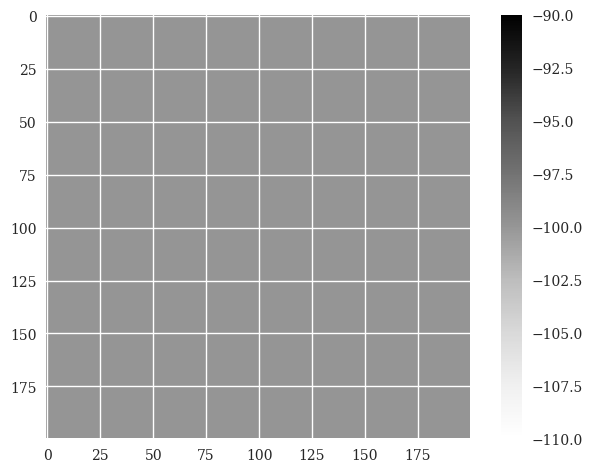

In [20]:
x = np.load(onlyfiles(Paths.numpy_data + 'Spectrum_Width_26850')[0])[:,:,0]
plt.imshow(np.load(onlyfiles(Paths.numpy_data + 'Spectrum_Width_26850')[0])[:,:,0])
plt.colorbar()

In [162]:
np.all(x == shaped_array[:,:,0])

False

In [5]:
data = onlyfiles('/home/meteofurletov/iram/lightning/data/binary data/W26061/')
data

['/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/161001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/200001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/052001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/151001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/174001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/122001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/150001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/115001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/230001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/135001.07W',
 '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M07/D01/183001.07W',
 '/home/meteofurletov/iram/light

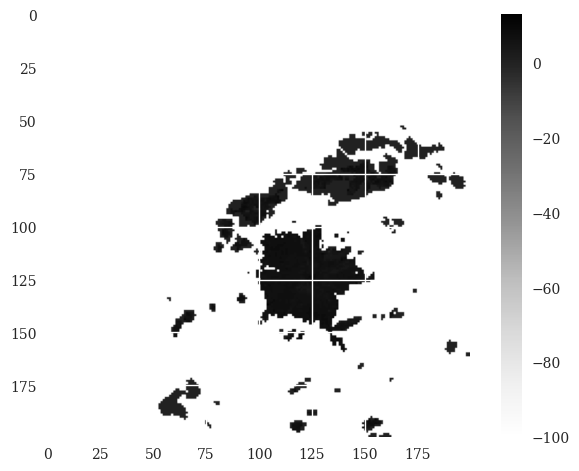

In [30]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M08/D29/180029.08W'

array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
iterator = np.array(())
for i in range(1, len(data) // 514):
    iterator = np.append(
        iterator,
        np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
    )
for i in iterator.astype(int):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    if x > 199 or y >199:
                        continue
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,0])
plt.colorbar()

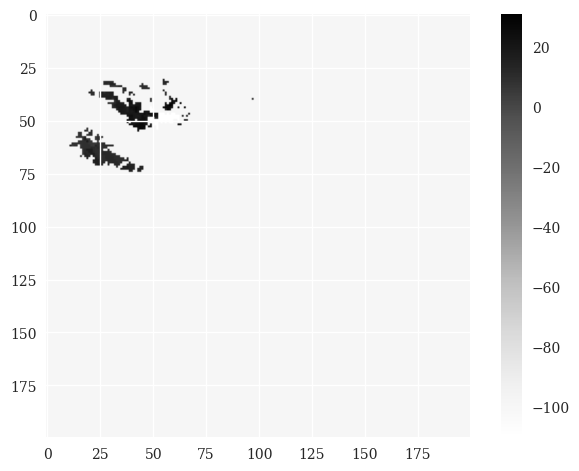

In [4]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/002708.01A'

array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
for i in range(514, array_one_time.shape[0] - 20):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,0])
plt.colorbar()

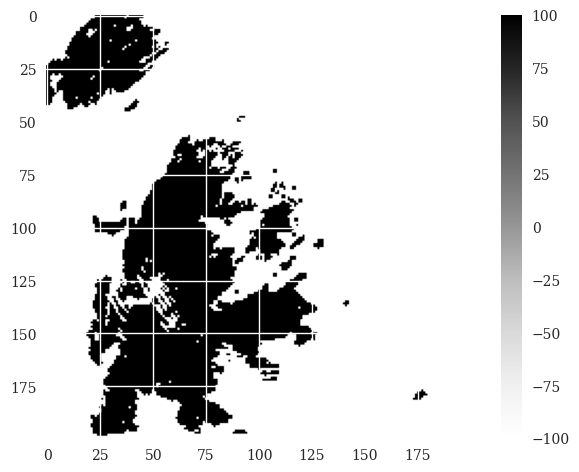

In [21]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/R26850/G2021/M07/D31/211031.07R'
array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
iterator = np.array(())
for i in range(1, len(data) // 514):
    iterator = np.append(
        iterator,
        np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
    )
for i in iterator.astype(int):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,10])
plt.colorbar()

In [74]:
from collections import Counter

In [75]:
Counter(shaped_array.flatten())

Counter({-100: 336413,
         100: 80032,
         3: 508,
         4: 442,
         0: 471,
         -4: 1027,
         2: 454,
         1: 307,
         -3: 810,
         -2: 1015,
         5: 329,
         9: 96,
         6: 193,
         7: 148,
         10: 49,
         8: 100,
         20: 1,
         11: 48,
         13: 23,
         -6: 1617,
         12: 37,
         -5: 1287,
         16: 4,
         14: 30,
         17: 4,
         18: 2,
         -8: 2182,
         -9: 1896,
         -18: 251,
         -11: 1351,
         15: 17,
         -12: 1252,
         -10: 1491,
         -7: 1951,
         -13: 1179,
         -14: 1082,
         -15: 903,
         -19: 283,
         -20: 153,
         -16: 327,
         -26: 5,
         -24: 1,
         -17: 188,
         -21: 34,
         -22: 2,
         -25: 4,
         -27: 1})

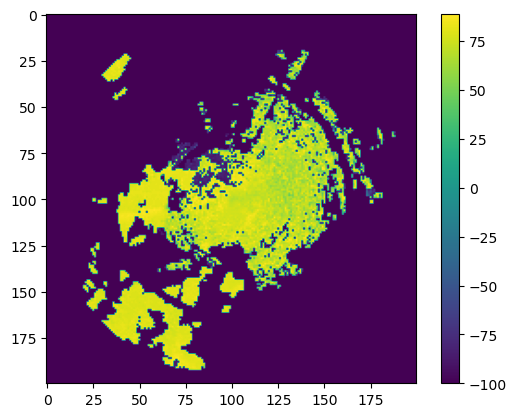

In [103]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/F26850/G2021/M07/D31/211031.07F'
array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
iterator = np.array(())
for i in range(1, len(data) // 514):
    iterator = np.append(
        iterator,
        np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
    )
for i in iterator.astype(int):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,1])
plt.colorbar()

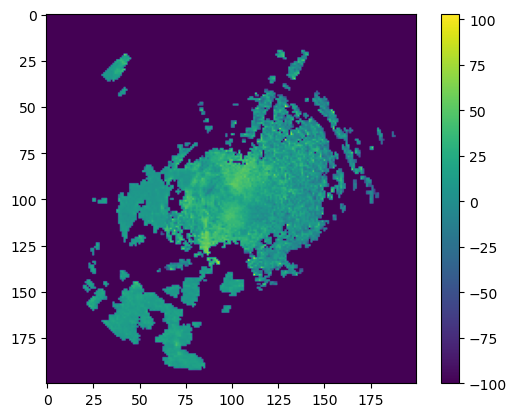

In [118]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M07/D31/211031.07D'
array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
iterator = np.array(())
for i in range(1, len(data) // 514):
    iterator = np.append(
        iterator,
        np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
    )
for i in iterator.astype(int):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,1])
plt.colorbar()

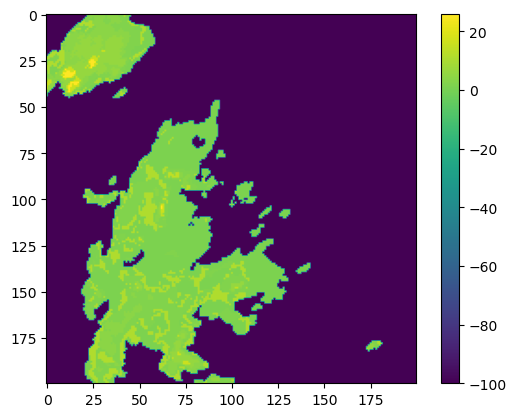

In [63]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D31/211031.07A'
array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
for i in range(514, array_one_time.shape[0] - 20, 16):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,1])
plt.colorbar()

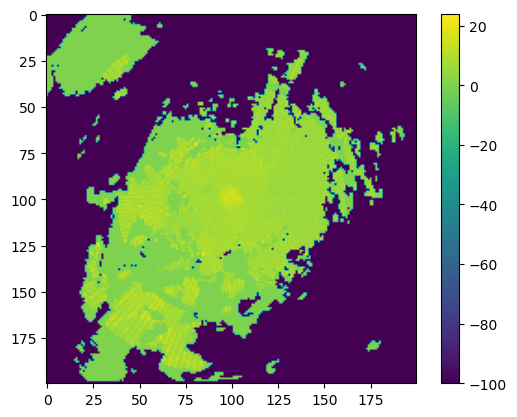

In [104]:
fileName = '/home/meteofurletov/iram/lightning/data/binary data/W26850/G2021/M07/D31/211031.07W'

array_one_time = np.fromfile(fileName, dtype="byte")
data = np.fromfile(fileName, dtype="ubyte")
shaped_array = np.full((200, 200, 11), -100)
iterator = np.array(())
for i in range(1, len(data) // 514):
    iterator = np.append(
        iterator,
        np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
    )
for i in iterator.astype(int):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 3]
                    shaped_array[y][x][1] = array_one_time[i + 4]
                    shaped_array[y][x][2] = array_one_time[i + 5]
                    shaped_array[y][x][3] = array_one_time[i + 6]
                    shaped_array[y][x][4] = array_one_time[i + 7]
                    shaped_array[y][x][5] = array_one_time[i + 8]
                    shaped_array[y][x][6] = array_one_time[i + 9]
                    shaped_array[y][x][7] = array_one_time[i + 10]
                    shaped_array[y][x][8] = array_one_time[i + 11]
                    shaped_array[y][x][9] = array_one_time[i + 12]
                    shaped_array[y][x][10] = array_one_time[i + 13]
plt.imshow(shaped_array[:,:,1])
plt.colorbar()

In [19]:
pd.DataFrame(shaped_array.flatten()).describe()

,0
count,440000.000000
mean,-94.037609
std,24.032361
min,-100.000000
25%,-100.000000
50%,-100.000000
75%,-100.000000
max,28.000000


In [ ]:
def convert_binary_to_array_reflectivity(
    list_of_files, station_number, path_to_save
) -> None:
    """Convert binary data of reflectivity on all levels to npy arrays in folder separately"""
    if os.path.isdir(path_to_save + f"reflectivity_{station_number}"):
        print("reflectivity data is already converted")
        return

    else:
        print("Converting reflectivity")
        Path(path_to_save + f"reflectivity_{station_number}").mkdir(
            parents=True, exist_ok=True
        )
        for fileName in tqdm(list_of_files):
            array_one_time = np.fromfile(fileName, dtype="byte")
            data = np.fromfile(fileName, dtype="ubyte")
            shaped_array = np.full((200, 200, 11), -100)

            for i in range(514, array_one_time.shape[0] - 20, 16):
                if data[i] == 255:
                    y = data[i + 1]
                    x = data[i + 2]
                    shaped_array[y][x][0] = array_one_time[i + 5]
                    shaped_array[y][x][1] = array_one_time[i + 6]
                    shaped_array[y][x][2] = array_one_time[i + 7]
                    shaped_array[y][x][3] = array_one_time[i + 8]
                    shaped_array[y][x][4] = array_one_time[i + 9]
                    shaped_array[y][x][5] = array_one_time[i + 10]
                    shaped_array[y][x][6] = array_one_time[i + 11]
                    shaped_array[y][x][7] = array_one_time[i + 12]
                    shaped_array[y][x][8] = array_one_time[i + 13]
                    shaped_array[y][x][9] = array_one_time[i + 14]
                    shaped_array[y][x][10] = array_one_time[i + 15]

            shaped_array = shaped_array.astype("int32")
            np.save(
                path_to_save
                + f"reflectivity_{station_number}/{re.search('S.....', fileName).group(0)[1:]}_"
                f"{re.search('G....', fileName).group(0)[1:]}_{re.search('M..', fileName).group(0)[1:]}_"
                f"{re.search('D..', fileName).group(0)[1:]}__{re.findall('/....', fileName)[-1][1:3]}_"
                f"{re.findall('/....', fileName)[-1][3:5]}.npy",
                shaped_array,
            )

In [ ]:
def convert_binary_to_array_zdr(list_of_files, station_number, path_to_save) -> None:
    """Convert binary data of zdr on all levels to npy arrays in folder separately"""
    Path(path_to_save + f"zdr_{station_number}").mkdir(parents=True, exist_ok=True)

    indicies_to_delete = np.concatenate((np.arange(0, 26), np.arange(252 - 26, 252)))

    for fileName in tqdm(list_of_files):
        array_one_time = np.fromfile(fileName, dtype="byte")
        data = np.fromfile(fileName, dtype="ubyte")
        shaped_array = np.full((252, 252, 11), -100)

        iterator = np.array(())
        for i in range(1, len(data) // 514):
            iterator = np.append(
                iterator,
                np.arange(514 * i - 2 * (i - 1), 514 * i + 504 - 2 * (i - 1), 14),
            )

        for i in iterator.astype(int):
            if data[i] == 255:
                y = data[i + 1]
                x = data[i + 2]
                shaped_array[y][x][0] = array_one_time[i + 3]
                shaped_array[y][x][1] = array_one_time[i + 4]
                shaped_array[y][x][2] = array_one_time[i + 5]
                shaped_array[y][x][3] = array_one_time[i + 6]
                shaped_array[y][x][4] = array_one_time[i + 7]
                shaped_array[y][x][5] = array_one_time[i + 8]
                shaped_array[y][x][6] = array_one_time[i + 9]
                shaped_array[y][x][7] = array_one_time[i + 10]
                shaped_array[y][x][8] = array_one_time[i + 11]
                shaped_array[y][x][9] = array_one_time[i + 12]
                shaped_array[y][x][10] = array_one_time[i + 13]

        arr_deleted_0 = np.delete(shaped_array, indicies_to_delete, 0)
        arr_deleted_1 = np.delete(arr_deleted_0, indicies_to_delete, 1)
        shaped_array = shaped_array.astype("int32")

        np.save(
            path_to_save
            + f"zdr_{station_number}/{re.search('S.....', fileName).group(0)[1:]}_"
            f"{re.search('G....', fileName).group(0)[1:]}_{re.search('M..', fileName).group(0)[1:]}_"
            f"{re.search('D..', fileName).group(0)[1:]}__{re.findall('/....', fileName)[-1][1:3]}_"
            f"{re.findall('/....', fileName)[-1][3:5]}.npy",
            shaped_array,
        )

In [9]:
year_regex = '2021'
n_non_lightning = 500

In [10]:
    path = Paths.binary + f"S{station_number}"
    radar_files = onlyfiles(path)
    radar_files = [elem for elem in radar_files if re.search(f"G{year_regex}", elem)]

    # getting matched dates
    blitz_data = pd.read_parquet(Paths.interim + f"df_blitz_{station_number}.parquet")
    blitz_test = blitz_data[
        blitz_data["date"].astype(str).str.contains(year_regex, regex=True)
    ]
    blitz_dates = np.unique(blitz_test.date)
    matched_list = get_same_dates(radar_files, blitz_dates)
    print(f"N of matched files is {len(matched_list)}")
    match_str = [str(elem) for elem in matched_list]

    # get non-lightning cases
    file_sizes = [os.path.getsize(file) for file in radar_files]
    files = pd.DataFrame((radar_files, file_sizes)).T
    files.columns = ["name", "size"]
    top_2k_by_size = list(
        files.sort_values(by=["size"], ascending=False)[:n_non_lightning]["name"]
    )
    binary_matched_list = get_binary_list_from_matched_list(match_str, 26061, "S", "A")
    difference = list(
        set.difference(*map(set, [top_2k_by_size, list(binary_matched_list)]))
    )
    print(f"N of non-lightning cases: {len(difference)}")

    secondary_data = []
    for i in range(len(difference)):
        fileName = difference[i]
        date = (
            f"{re.search('S.....', fileName).group(0)[1:]}_"
            f"{re.search('G....', fileName).group(0)[1:]}_{re.search('M..', fileName).group(0)[1:]}_"
            f"{re.search('D..', fileName).group(0)[1:]}__{re.findall('/....', fileName)[-1][1:3]}_"
            f"{re.findall('/....', fileName)[-1][3:5]}"
        )
        secondary_data.append(date)
    radar_dt = pd.to_datetime(
        [elem.replace("_", "-")[6:] for elem in secondary_data],
        format="%Y-%m-%d--%H-%M",
    )
    radar_str = [str(elem) for elem in radar_dt]
    all_data = list(set(match_str).union(set(radar_str)))
    all_data.sort()

    binary_all = get_binary_list_from_matched_list(all_data, station_number, "S", "A")

    Z = binary_all
    W = [
        elem.replace("W", "S", 1).replace("W", "A", 1)
        for elem in onlyfiles(Paths.binary + f"W{station_number}")
    ]
    R = [
        elem.replace("R", "S", 1).replace("R", "A", 1)
        for elem in onlyfiles(Paths.binary + f"R{station_number}")
    ]
    D = [
        elem.replace("D", "S", 1)[:-1] + 'A'
        for elem in onlyfiles(Paths.binary + f"D{station_number}")
    ]
    F = [
        elem.replace("F", "S", 1).replace("F", "A", 1)
        for elem in onlyfiles(Paths.binary + f"F{station_number}")
    ]

    binary_matched = list(set(Z) & set(W) & set(R) & set(D) & set(F))

N of matched files is 3284
N of non-lightning cases: 500


In [195]:
len(binary_matched)

3752

In [24]:
binary_matched = date_intersection(Paths.binary, station_number, year_regex)

In [27]:
binary_matched

['/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M03/D07/062007.03A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M03/D14/183014.03A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D01/165001.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D07/161007.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/112015.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/113015.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/114015.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/115015.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/121015.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/122015.04A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M04/D15/123015.04A',
 '/home/meteofurletov/iram/light

In [194]:
len(list(set(Z)&set(W) & set(R)& set(D)& set(F)))

3752

In [21]:
param_files = [re.sub("S|A", 'D', elem) for elem in binary_matched]
param_files

['/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M05/D17/150017.05D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M08/D17/004017.08D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M09/D01/065001.09D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M09/D18/122018.09D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M01/D25/201025.01D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M06/D29/083029.06D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M07/D05/235005.07D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M07/D17/101017.07D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M04/D18/152018.04D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M12/D02/060002.12D',
 '/home/meteofurletov/iram/lightning/data/binary data/D26850/G2021/M07/D18/184018.07D',
 '/home/meteofurletov/iram/light

In [1]:
from DWR_preprocess import *
station_number = 26850
year_regex = '2021'

In [2]:
stack = (
            np.load(Paths.interim + f"stack_{station_number}.npy")
            .reshape(-1, 64)
            .astype('int8')
        )

In [3]:
stack.shape

(131120000, 64)

In [4]:
stack = pd.DataFrame(stack.reshape(-1, 64))

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
stack.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,131120000.0,131120000.0,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,131120000.0,131120000.0,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08,1.311200e+08
mean,-8.499300e+01,-8.349127e+01,-8.211480e+01,-8.138648e+01,-8.209413e+01,-8.369552e+01,-8.594978e+01,-8.865455e+01,-9.162574e+01,-9.406966e+01,-9.621307e+01,6.246755e+00,1.234015e+00,4.665650e+00,1.203173e+00,-1.834045e+00,7.340000e+00,7.340000e+00,2.092739e+00,-9.989236e+01,-9.989236e+01,-9.991608e+01,-9.990842e+01,-9.992251e+01,-9.991483e+01,-9.990066e+01,-9.989643e+01,-9.989302e+01,-9.989242e+01,-9.989236e+01,-9.993067e+01,-9.993067e+01,-9.992706e+01,-9.992893e+01,-9.992690e+01,-9.992775e+01,-9.992910e+01,-9.992873e+01,-9.993008e+01,-9.992983e+01,-9.993043e+01,-100.0,-100.0,-9.995216e+01,-9.997838e+01,-9.995255e+01,-9.996486e+01,-9.998111e+01,-9.997683e+01,-9.999276e+01,-9.998973e+01,-9.999651e+01,-100.0,-100.0,-9.993900e+01,-9.997300e+01,-9.993724e+01,-9.995390e+01,-9.997433e+01,-9.997059e+01,-9.999020e+01,-9.998590e+01,-9.999487e+01,5.535845e-04
std,3.621601e+01,3.782544e+01,3.917705e+01,3.965834e+01,3.871544e+01,3.685030e+01,3.429798e+01,3.104505e+01,2.697797e+01,2.290103e+01,1.845776e+01,1.309643e+01,3.418997e+00,7.640927e+01,7.514416e+01,7.408039e+01,8.146327e+01,8.146327e+01,7.814597e+01,4.638586e+00,4.638586e+00,3.796982e+00,4.088829e+00,3.536808e+00,3.847447e+00,4.363865e+00,4.505988e+00,4.617344e+00,4.636685e+00,4.638586e+00,2.632153e+00,2.632153e+00,2.771831e+00,2.700407e+00,2.778097e+00,2.746132e+00,2.693916e+00,2.708511e+00,2.655384e+00,2.665231e+00,2.641816e+00,0.0,0.0,2.310751e+00,1.532336e+00,2.255729e+00,1.939205e+00,1.420298e+00,1.573441e+00,8.752302e-01,1.045664e+00,6.084211e-01,0.0,0.0,3.282825e+00,2.179289e+00,3.336427e+00,2.854498e+00,2.132763e+00,2.272458e+00,1.317006e+00,1.583944e+00,9.593453e-01,3.206654e-02
min,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,-1.270000e+02,-1.280000e+02,-1.280000e+02,-1.280000e+02,-1.280000e+02,-1.280000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-100.0,-100.0,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-100.0,-100.0,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00
25%,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,-6.000000e+01,-6.400000e+01,-6.600000e+01,-7.825000e+01,-7.825000e+01,-6.600000e+01,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02

In [10]:
np.unique(stack[:,:,:,33], return_counts=True)

(array([-100,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   31], dtype=int32),
 array([131029094,     63609,         5,        46,       404,      1686,
             2941,      3637,      3771,      3291,      2766,      2360,
             1912,      1504,      1143,       746,       477,       269,
              135,        91,        47,        23,        16,         4,
                8,         4,         7,         1,         2,         1]))

In [3]:
np.unique(stack[:,:,:,12], return_counts=True)

(array([ 0,  1,  2,  3,  4,  6,  7, 11, 13, 14, 16, 17, 23, 24, 26, 27],
       dtype=int32),
 array([103880546,   6833359,   3311298,   3152293,   2793029,   1708795,
            60392,   6852758,    724946,    819827,    429720,     50037,
             6200,     16158,    472487,      8155]))

In [8]:
f = (lambda x: 1 if x == 6 or x == 16 or x == 26 else 0)
light = np.vectorize(f)(stack[:,:,:,12])
np.unique(light, return_counts=True)

(array([0, 1]), array([128508998,   2611002]))

In [13]:
target_binary = np.where(stack[:,:,:,-1] >0,1, 0)

In [14]:
phen = np.where(stack[:,:,:,12] >0,1, 0)

Accuracy is 0.7926
f1_score is 0.0037
precision_score is 0.9231
recall_score is 0.0018
roc_auc_score is 0.8578
HSS is 0.0028
ETS is 0.0014
CSI is 0.0018
sedi is 0.2329


0    0.792605
1    0.003659
2    0.923127
3    0.001833
4    0.857839
5    0.002838
6    0.001421
7    0.001833
8    0.232871
dtype: float64

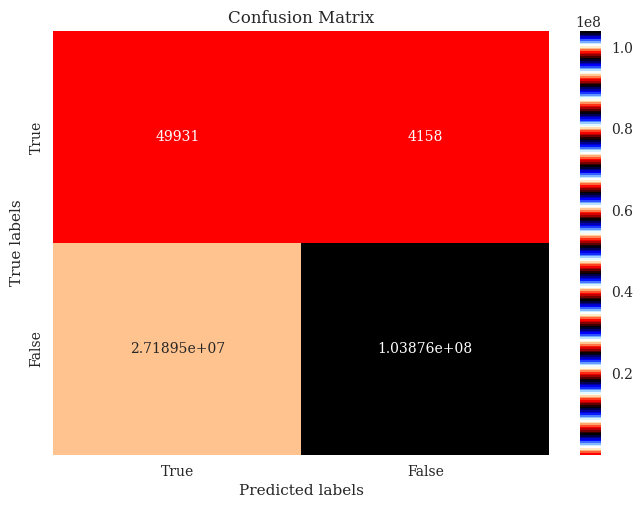

In [15]:
scorer(target_binary.flatten(), phen.flatten())

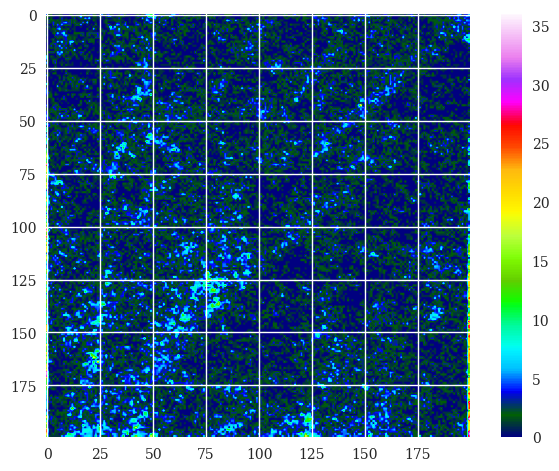

In [16]:
plt.imshow(np.sum(stack[:,:,:,-1],axis=0), cmap='gist_ncar')
plt.colorbar()

In [24]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

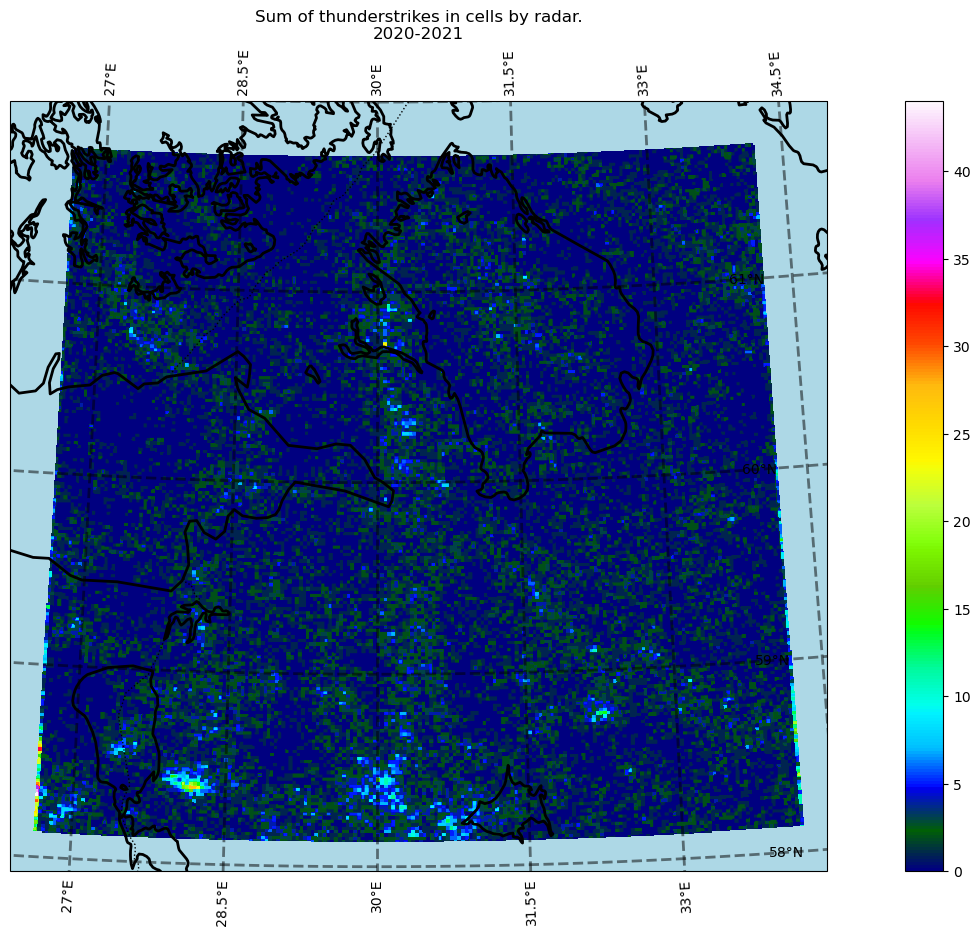

In [27]:
fig = plt.figure(figsize=(20,10))
# get the path of the file. It can be found in the repo data directory
img_extent = (26.625097804781607, 34.19102219521839,
              58.117582381530546, 61.72575761846945)

ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=30))
plt.title('Sum of thunderstrikes in cells by radar.\n'
          '2020-2021')

ax.use_sticky_edges = False
# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

ax.set_extent([26.625097804781607-0.2, 34.19102219521839+0.2,
               58.117582381530546-0.2, 61.72575761846945+0.2],
              crs=ccrs.PlateCarree())


ax.add_feature(cfeature.OCEAN,facecolor=("lightblue"))
ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.LAKES, facecolor='None',
               edgecolor='black', linewidth=2)

ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2,
             color='black', alpha=0.5, linestyle='--',
             draw_labels=True)

plt.imshow(stack[:,:,:,-1].sum(axis=0),
           cmap = 'gist_ncar',
           origin='upper',
           extent=img_extent,
           transform=ccrs.PlateCarree())



plt.colorbar()#shrink = 0.5,aspect = 8)
plt.show()

final_radar = np.concatenate(
    (reflectivity, np.stack((echotop, phen), axis=3), prop_array, R, W, D, F),
    axis=3,

In [26]:
stack[:,:,:,-1].sum()

39229

In [19]:
[f'F{i}' for i in range(1, 12)]

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11']

In [14]:
stack[:,:,:,19:30]

(3752, 200, 200, 11)

In [18]:
np.fromfile('/home/meteofurletov/iram/lightning/data/binary data/W26061/G2021/M01/D01/000001.01W', dtype='byte')[186:200]

array([83, 50, 54, 48, 54, 49, 78, 85, 76, 76, 32, 32, 32, 32], dtype=int8)

In [3]:
from DWR_preprocess import *

In [20]:
def date_intersection(path_to_binary, station_number, year_regex):
    """"Найти все совпадающие радарные файлы и данные о грозах в"""

    # Найти пересечение радарных файлов
    Z = onlyfiles(path_to_binary + f"S{station_number}")
    W = [
        elem.replace("W", "S", 1).replace("W", "A", 1)
        for elem in onlyfiles(path_to_binary + f"W{station_number}")
    ]
    R = [
        elem.replace("R", "S", 1).replace("R", "A", 1)
        for elem in onlyfiles(path_to_binary + f"R{station_number}")
    ]
    D = [
        elem.replace("D", "S", 1)[:-1] + "A"
        for elem in onlyfiles(path_to_binary+ f"D{station_number}")
    ]
    F = [
        elem.replace("F", "S", 1).replace("F", "A", 1)
        for elem in onlyfiles(path_to_binary + f"F{station_number}")
    ]
    radar_matched = list(set(Z) & set(W) & set(R) & set(D) & set(F))

    # get blitz dates

    blitz_data = pd.read_parquet(Paths.interim + f"df_blitz_{station_number}.parquet")
    blitz_test = blitz_data[
        blitz_data["date"].astype(str).str.contains(year_regex, regex=True)
    ]
    blitz_dates = np.unique(blitz_test.date)

    matched_list = get_same_dates(radar_matched, blitz_dates)
    match_str = [str(elem) for elem in matched_list]

    binary_list = get_binary_list_from_matched_list(match_str, station_number, "S", "A")
    return binary_list

In [2]:
len(date_intersection(Paths.binary, 26850, '2021')),date_intersection(Paths.binary, 26850, '2021')

(3278,
 ['/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M03/D07/062007.03A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M03/D14/183014.03A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D01/165001.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D07/161007.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/112015.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/113015.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/114015.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/115015.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/121015.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/122015.04A',
  '/home/meteofurletov/iram/lightning/data/binary data/S26061/G2021/M04/D15/123015.04A',
  '/home/meteo

In [4]:
path_to_binary = Paths.binary
Z = onlyfiles(path_to_binary + f"S{station_number}")
W = [
    elem.replace("W", "S", 1).replace("W", "A", 1)
    for elem in onlyfiles(path_to_binary + f"W{station_number}")
]
R = [
    elem.replace("R", "S", 1).replace("R", "A", 1)
    for elem in onlyfiles(path_to_binary + f"R{station_number}")
]
D = [
    elem.replace("D", "S", 1)[:-1] + "A"
    for elem in onlyfiles(path_to_binary+ f"D{station_number}")
]
F = [
    elem.replace("F", "S", 1).replace("F", "A", 1)
    for elem in onlyfiles(path_to_binary + f"F{station_number}")
]
radar_matched = list(set(Z) & set(W) & set(R) & set(D) & set(F))

In [6]:
len(radar_matched)

49529

In [8]:
size_list = [os.path.getsize(elem) for elem in radar_matched]



In [35]:
binary_matched = date_intersection(path_to_binary, station_number, year_regex)

In [34]:
n_extra_files = 500
sizes = pd.DataFrame((radar_matched, size_list)).T
sizes.columns = ['name', 'size']
extra_df = sizes.sort_values(by='size', ascending=False).iloc[:n_extra_files]
list(extra_df['name'])

['/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/233023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/234023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/232023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/230023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/235023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/231023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D24/000024.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/225023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/224023.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D24/001024.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D23/223023.09A',
 '/home/meteofurletov/iram/light

['/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M09/D16/220016.09A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M08/D12/135012.08A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M08/D17/111017.08A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D29/113029.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D01/205001.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M08/D12/122012.08A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M08/D06/193006.08A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D05/154005.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M07/D17/180017.07A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M05/D15/074015.05A',
 '/home/meteofurletov/iram/lightning/data/binary data/S26850/G2021/M08/D16/012016.08A',
 '/home/meteofurletov/iram/light